# Exploratory Data Analysis

## Problem Statement

This is the HR datasets. In our dataset 50000 rows and 14 columns. Every year, around 5% of its employees have promoted in the company. so, we have the check employee is promoted or not?

### Columns Name
- employee_id
- department
- region
- education
- gender
- recruitment_channel
- nooftrainings
- age 
- previousyearrating
- lengthofservice
- KPIs_met >80%
- awards_won?
- avgtrainingscore
- is_promoted

In [1]:
# import the libraries needed to use during the analysis

#libraries for the data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# libraries for the study of the models
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# libraries for the analysis of the results
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score,RocCurveDisplay




## Preparing the datset

In [2]:

# import the dataset
hr_dataset = pd.read_csv('hr_dataset.csv', delimiter = ',')

# quick overview of the dataset
hr_dataset.head(n=15)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [3]:
hr_dataset.info()
print("Shape of the dataset: ", hr_dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
Shape of the 

In [4]:
# check if there are null values
hr_dataset.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
# check the values from the column of type 'Object' so that they are unique and valid
for column in hr_dataset.columns:
    if hr_dataset[column].dtype == 'object':
        print(column, ": ", hr_dataset[column].unique())

department :  ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region :  ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education :  ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender :  ['f' 'm']
recruitment_channel :  ['sourcing' 'other' 'referred']


In [6]:
# As the dataset we are using is large, we can get rid of the null values without any significant impact on the result
hr_dataset.dropna(inplace=True)

In [7]:
#comprobamos que se han eliminado correctamente
hr_dataset.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [8]:
hr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           48660 non-null  int64  
 1   department            48660 non-null  object 
 2   region                48660 non-null  object 
 3   education             48660 non-null  object 
 4   gender                48660 non-null  object 
 5   recruitment_channel   48660 non-null  object 
 6   no_of_trainings       48660 non-null  int64  
 7   age                   48660 non-null  int64  
 8   previous_year_rating  48660 non-null  float64
 9   length_of_service     48660 non-null  int64  
 10  KPIs_met >80%         48660 non-null  int64  
 11  awards_won?           48660 non-null  int64  
 12  avg_training_score    48660 non-null  int64  
 13  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [9]:
# check duplicates on employee_id 
hr_dataset['employee_id'].duplicated().sum()

0

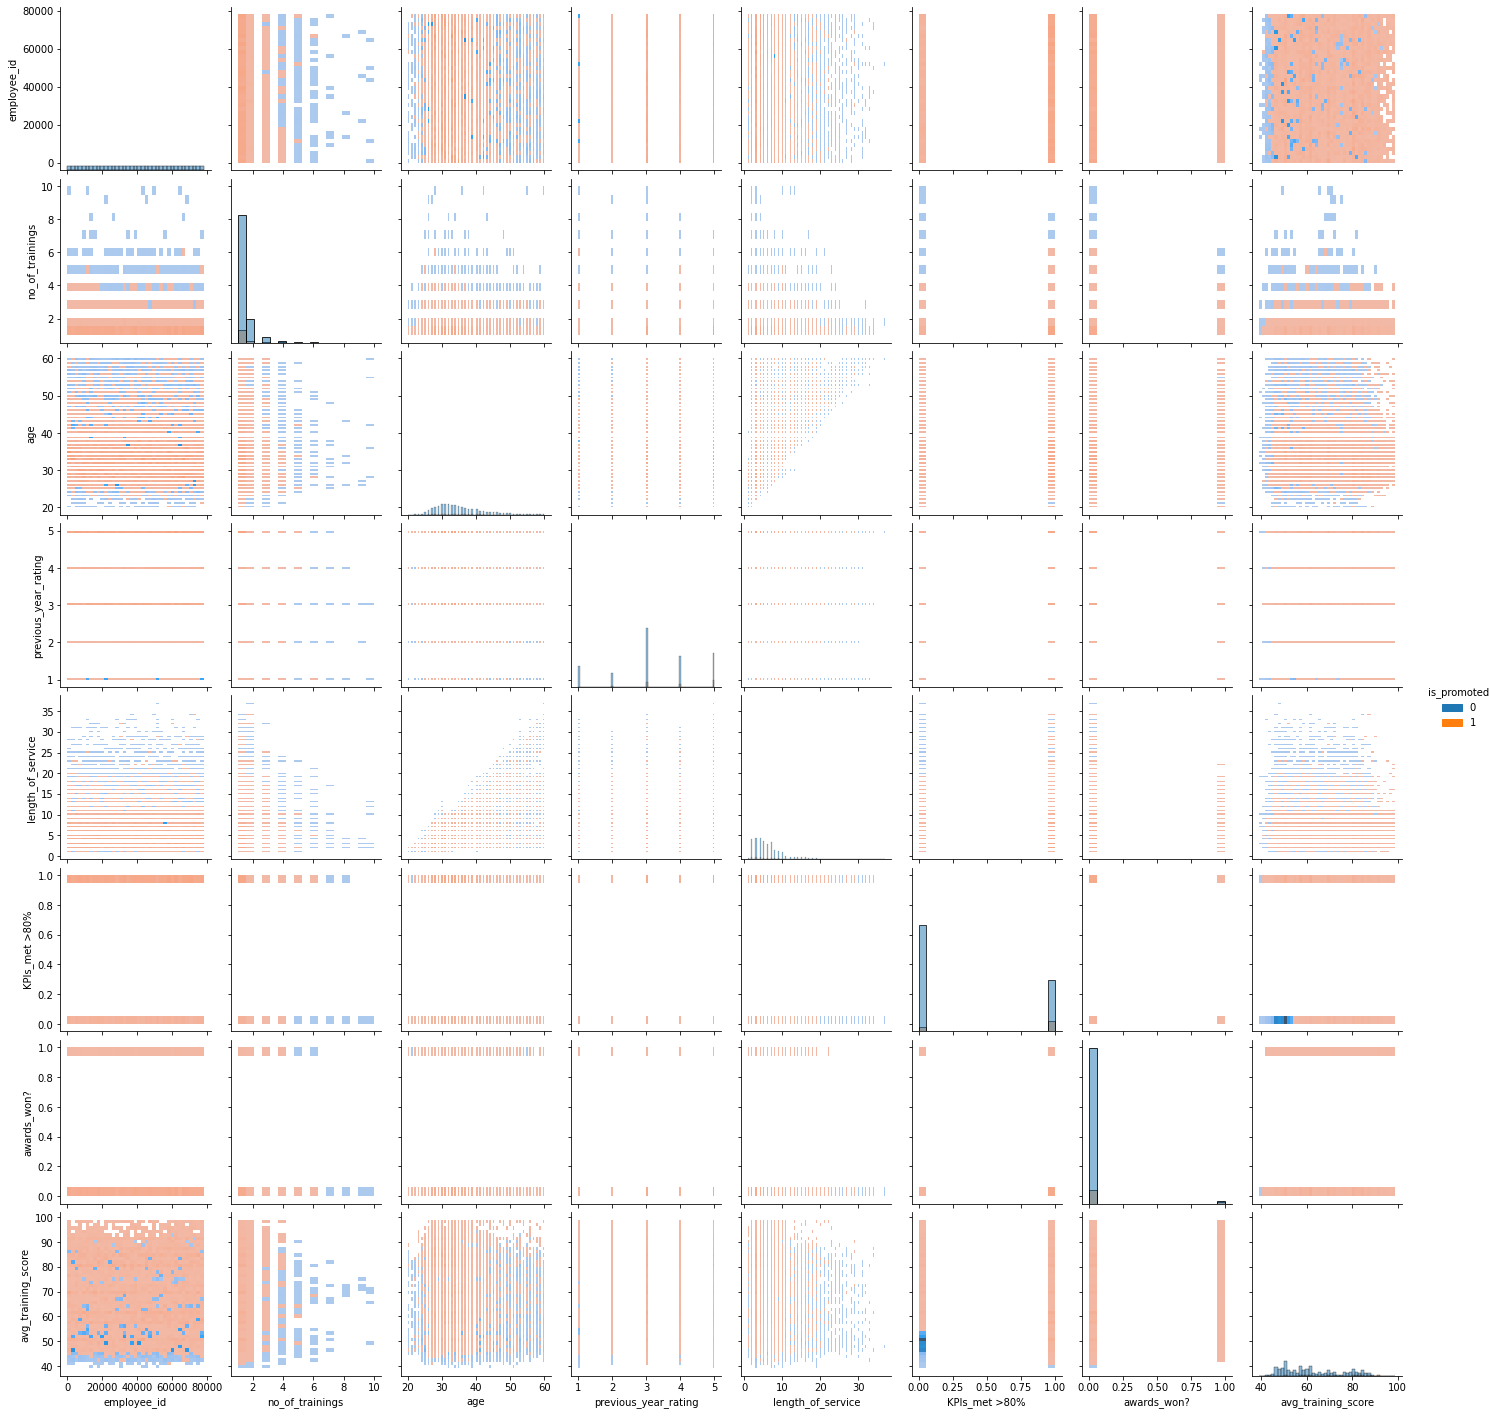

In [10]:
# Plotting graphs to get an overview of the variables
sns.pairplot(hr_dataset, hue="is_promoted", kind="hist")
plt.show()

<AxesSubplot:>

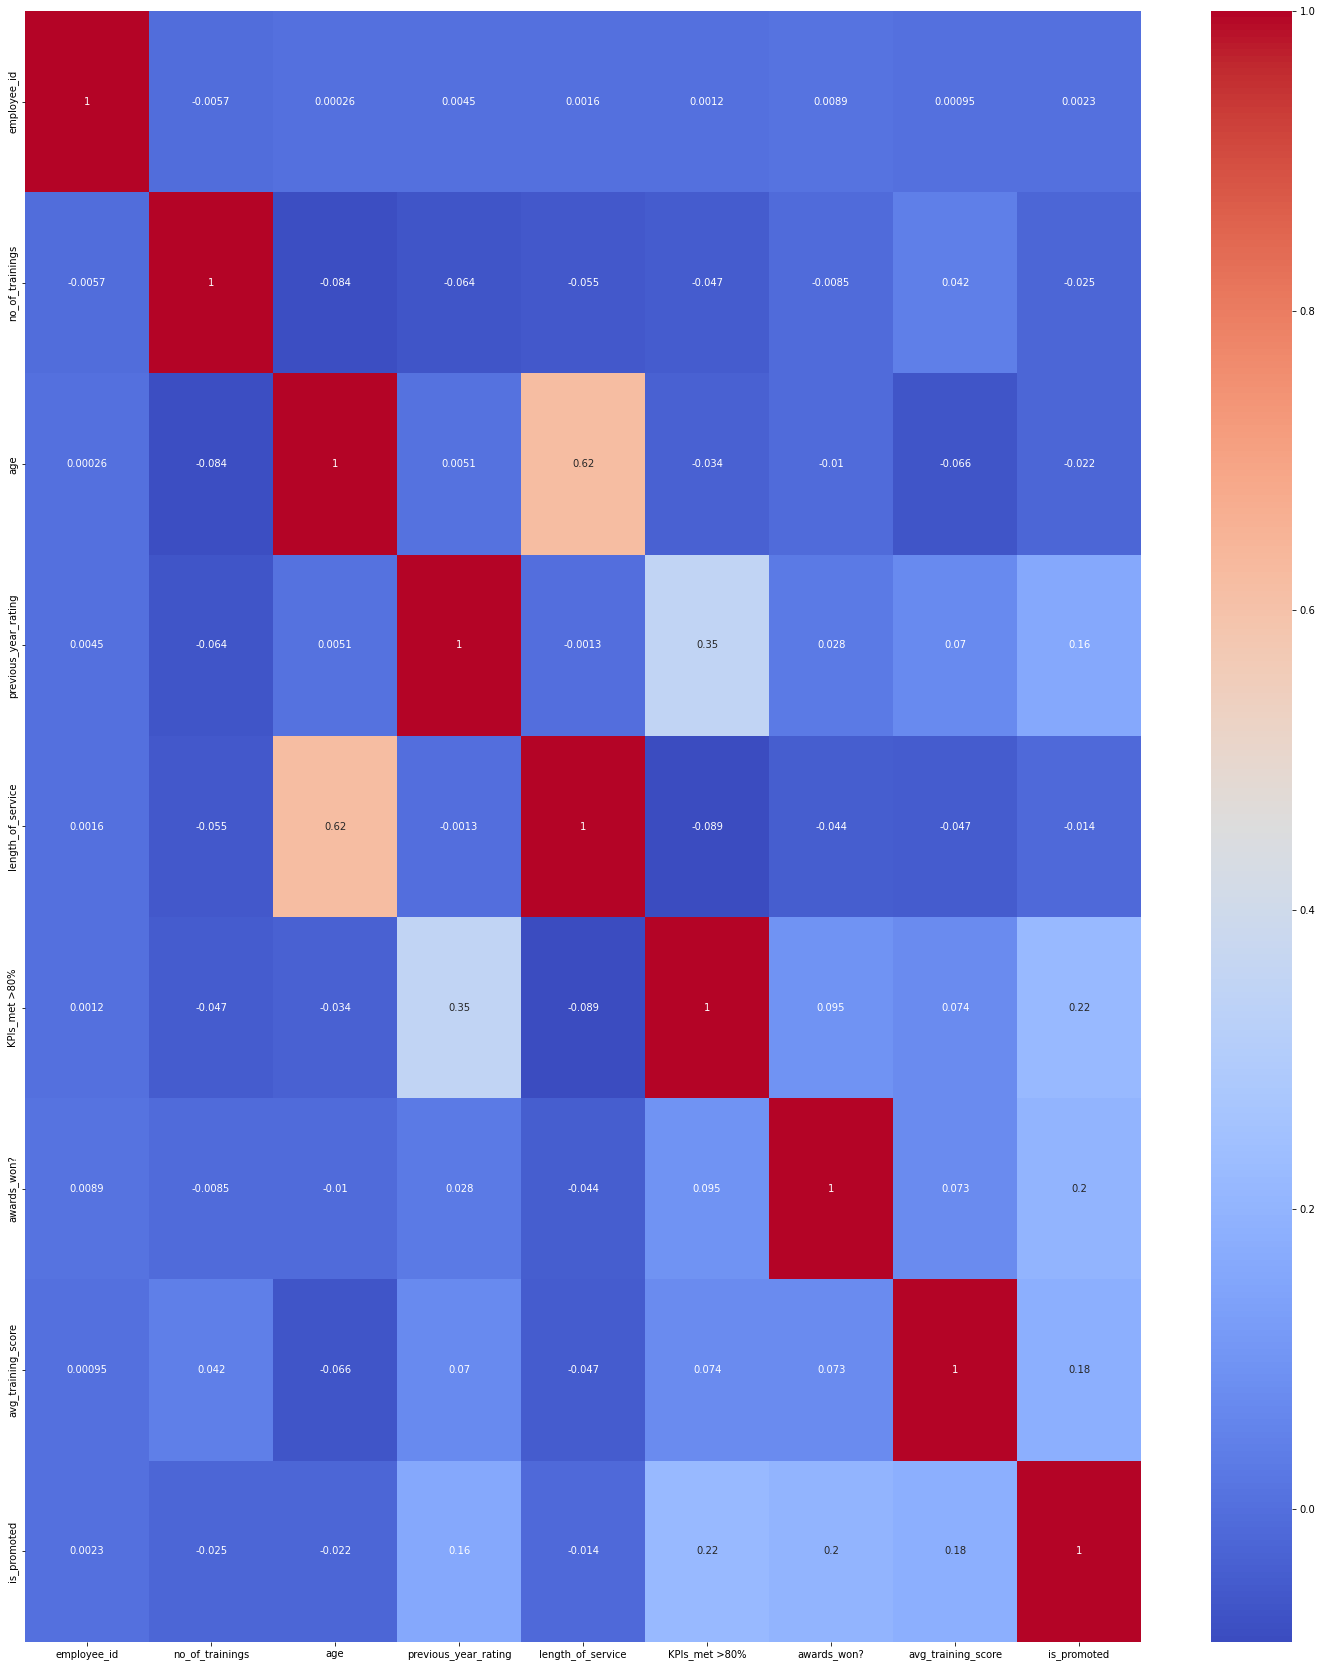

In [11]:
# Analyzing correlation between feaures
plt.figure(figsize=(25,30))
sns.heatmap(hr_dataset.corr(),annot=True, cmap='coolwarm')

In [12]:
##Pearsons's correlation coefficients shows us is there linear correlation between variables or not. 
#And the assumption about age and length_of_service correlation is confirmed
#All the other features are not correlated and that is good

array([[<AxesSubplot:title={'center':'employee_id'}>,
        <AxesSubplot:title={'center':'no_of_trainings'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'previous_year_rating'}>,
        <AxesSubplot:title={'center':'length_of_service'}>,
        <AxesSubplot:title={'center':'KPIs_met >80%'}>],
       [<AxesSubplot:title={'center':'awards_won?'}>,
        <AxesSubplot:title={'center':'avg_training_score'}>,
        <AxesSubplot:title={'center':'is_promoted'}>]], dtype=object)

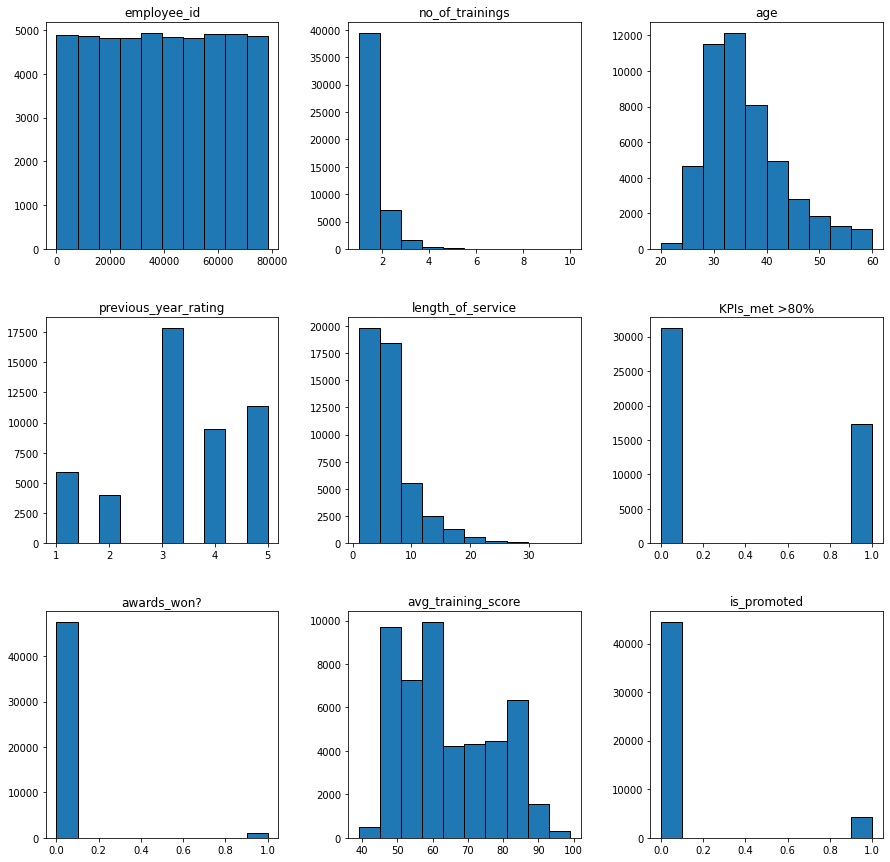

In [13]:
# Plotting the continuous variables

hr_dataset.hist(edgecolor='black', linewidth=1, figsize=(15,15), grid=False)

Text(0.5, 1.0, 'age')

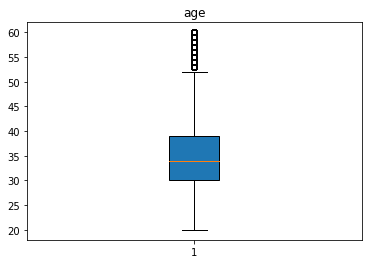

In [14]:
# Making a boxplot of some of the variables to visualize the overlays
plt.boxplot(hr_dataset['age'], patch_artist = True)
plt.title('age')

Text(0.5, 1.0, 'length_of_service')

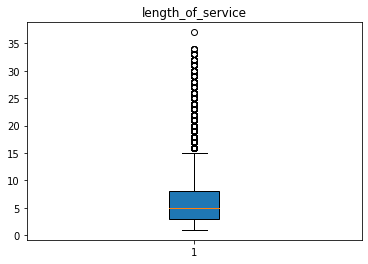

In [15]:
plt.boxplot(hr_dataset['length_of_service'], patch_artist = True)
plt.title('length_of_service')

Text(0.5, 1.0, 'avg_training_score')

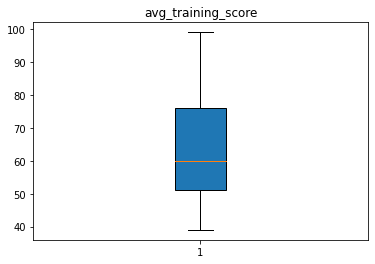

In [16]:
plt.boxplot(hr_dataset['avg_training_score'], patch_artist = True)
plt.title('avg_training_score')

Text(0.5, 1.0, 'Department')

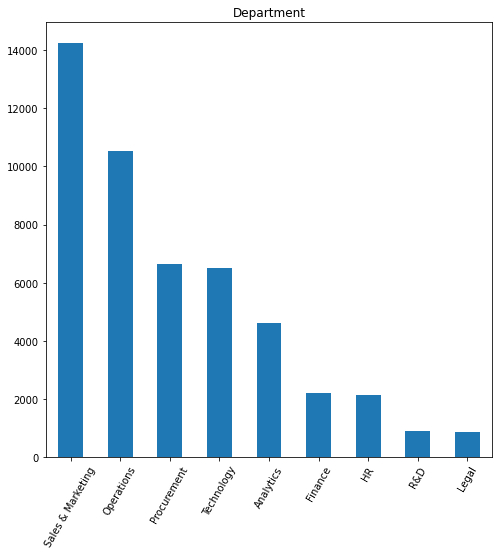

In [17]:
# Plotting the categorical variables:
## department
hr_dataset['department'].value_counts().plot.bar(rot=60,figsize=(8,8))
plt.title('Department')


Text(0.5, 1.0, 'Region')

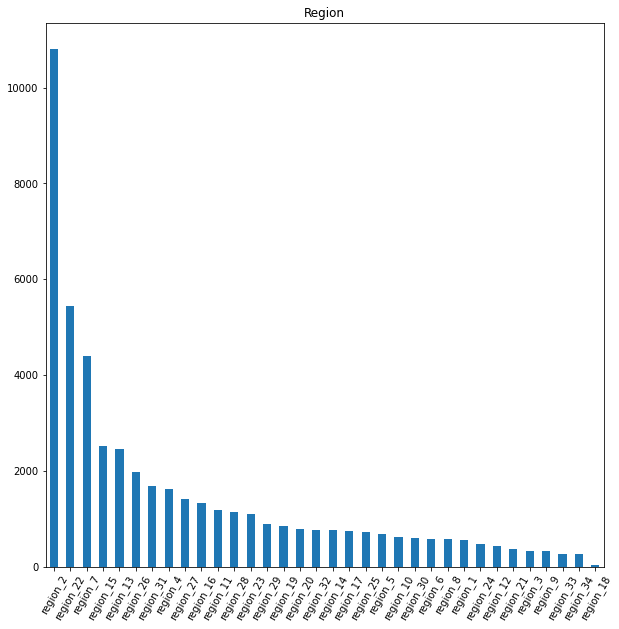

In [18]:
## region
hr_dataset['region'].value_counts().plot.bar(rot=60,figsize=(10,10))
plt.title('Region')


Text(0.5, 1.0, 'Education')

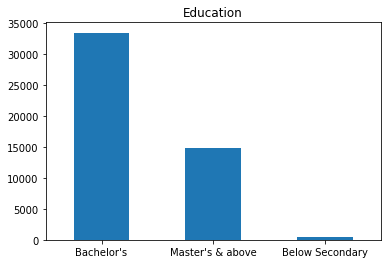

In [19]:
## education
hr_dataset['education'].value_counts().plot.bar(rot=0)
plt.title('Education')

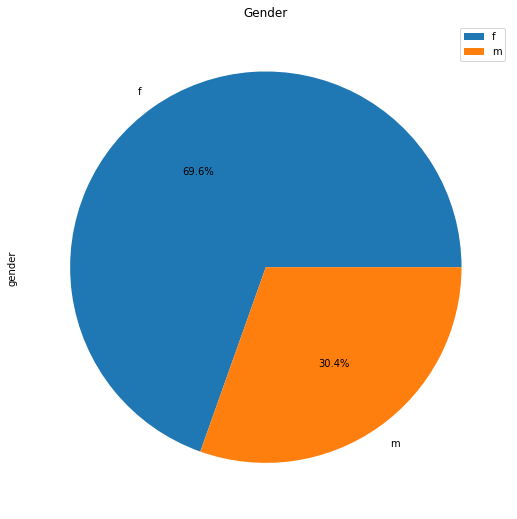

In [60]:
## gender

fig = plt.figure()
hr_dataset['gender'].value_counts().plot(kind="pie", labels=hr_dataset['gender'], legend=True, autopct='%.1f%%')
plt.title('Gender')
fig.patch.set_facecolor('white')



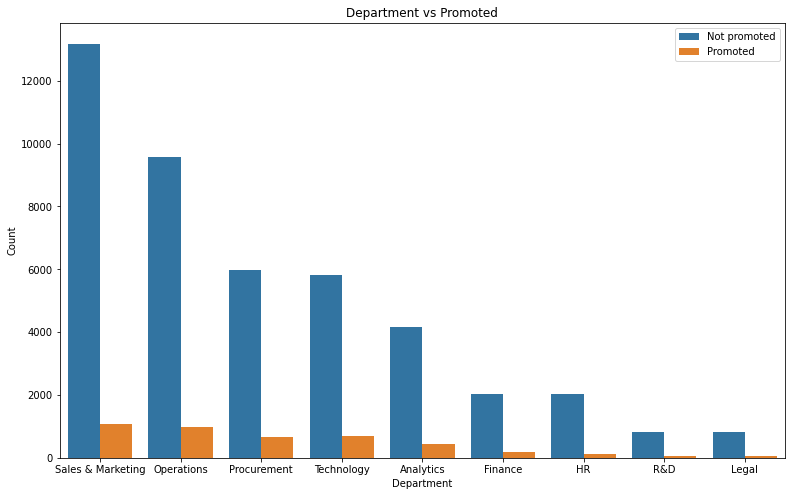

In [21]:
# Plotting each variable against the objective:
## department vs is promoted
plt.subplots(figsize=(13,8))
sns.countplot(x=hr_dataset['department'],hue=hr_dataset['is_promoted'], order = hr_dataset['department'].value_counts().index)
plt.title('Department vs Promoted')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(labels=['Not promoted', 'Promoted'])

## According to the plot, the most likely to be promoted are in the Sales&Marketing department

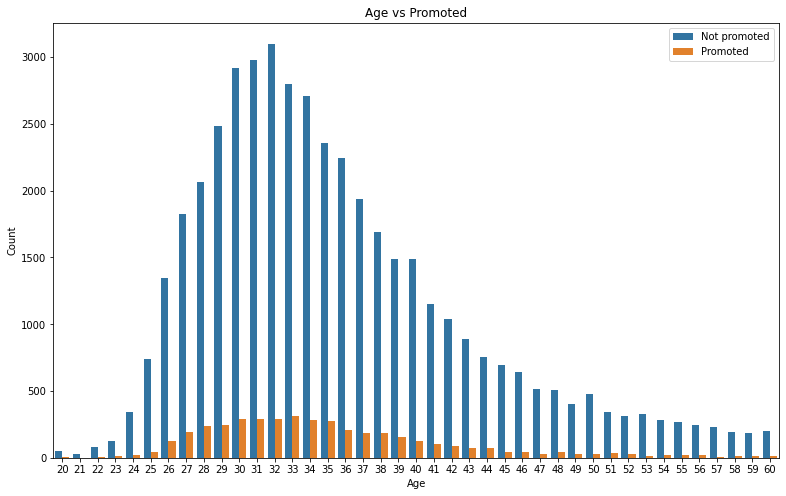

In [22]:
## age vs is promoted
plt.subplots(figsize=(13,8))
sns.countplot(x=hr_dataset['age'],hue=hr_dataset['is_promoted'])
plt.title('Age vs Promoted')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['Not promoted', 'Promoted'])


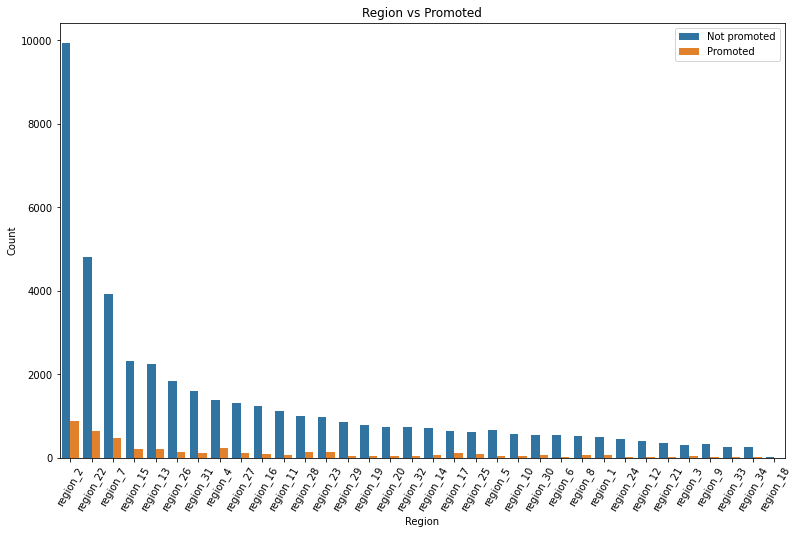

In [23]:
## region vs is promoted           
plt.subplots(figsize=(13,8))
sns.countplot(x=hr_dataset['region'],hue=hr_dataset['is_promoted'], order = hr_dataset['region'].value_counts().index)
plt.title('Region vs Promoted')
plt.xticks(rotation = 60)
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(labels=['Not promoted', 'Promoted'])



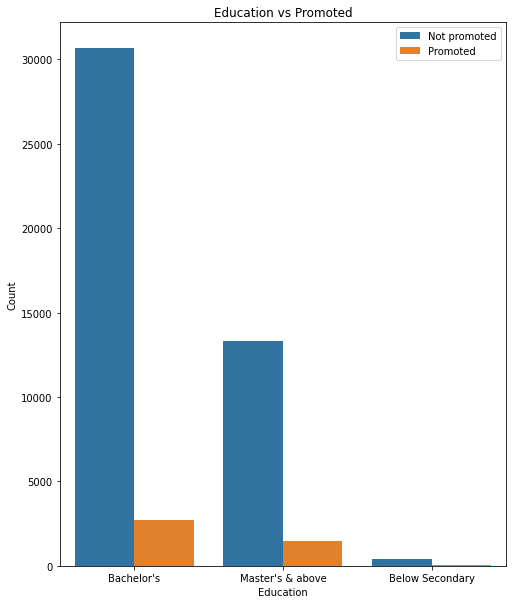

In [24]:
## education vs is promoted               
plt.subplots(figsize=(8,10))
sns.countplot(x=hr_dataset['education'],hue=hr_dataset['is_promoted'], order = hr_dataset['education'].value_counts().index)
plt.title('Education vs Promoted')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(labels=['Not promoted', 'Promoted'])



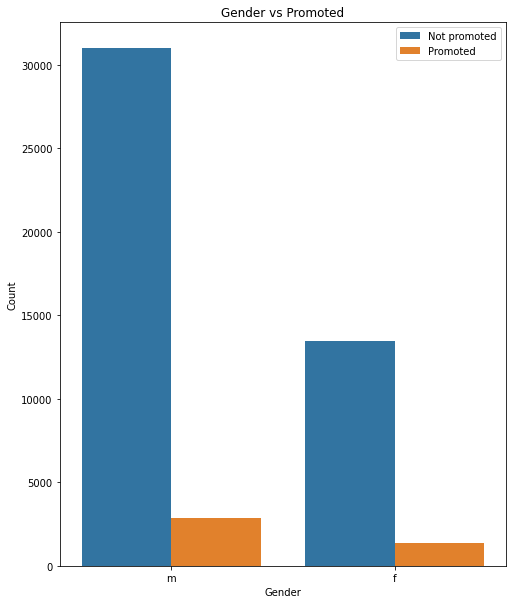

In [25]:
## gender vs is promoted                  
plt.subplots(figsize=(8,10))
sns.countplot(x=hr_dataset['gender'],hue=hr_dataset['is_promoted'], order = hr_dataset['gender'].value_counts().index)
plt.title('Gender vs Promoted')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(labels=['Not promoted', 'Promoted'])



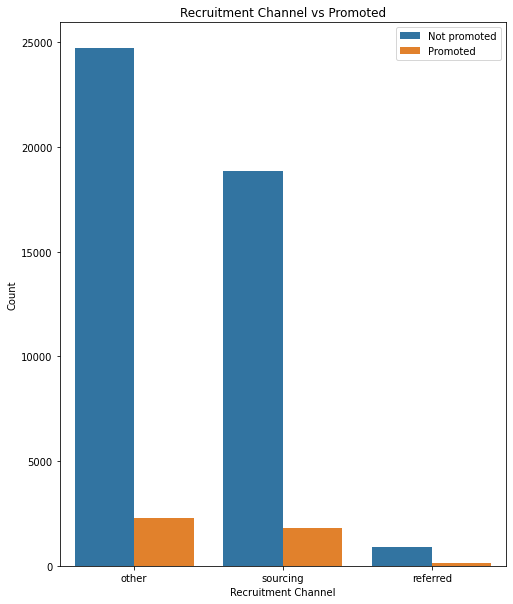

In [26]:
## recruitment_channel vs is promoted
plt.subplots(figsize=(8,10))
sns.countplot(x=hr_dataset['recruitment_channel'],hue=hr_dataset['is_promoted'], order = hr_dataset['recruitment_channel'].value_counts().index)
plt.title('Recruitment Channel vs Promoted')
plt.xlabel('Recruitment Channel')
plt.ylabel('Count')
plt.legend(labels=['Not promoted', 'Promoted'])


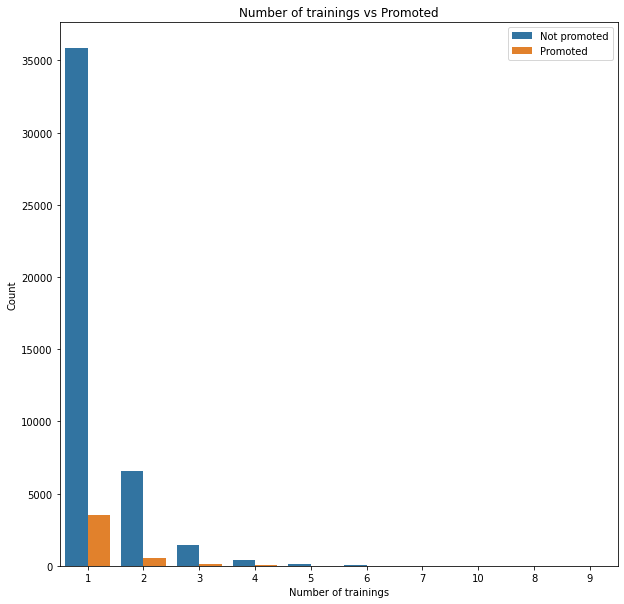

In [27]:
## no_of_trainings vs is promoted
plt.subplots(figsize=(10,10))
sns.countplot(x=hr_dataset['no_of_trainings'],hue=hr_dataset['is_promoted'], order = hr_dataset['no_of_trainings'].value_counts().index)
plt.title('Number of trainings vs Promoted')
plt.xlabel('Number of trainings')
plt.ylabel('Count')
plt.legend(loc='upper right',labels=['Not promoted', 'Promoted'])


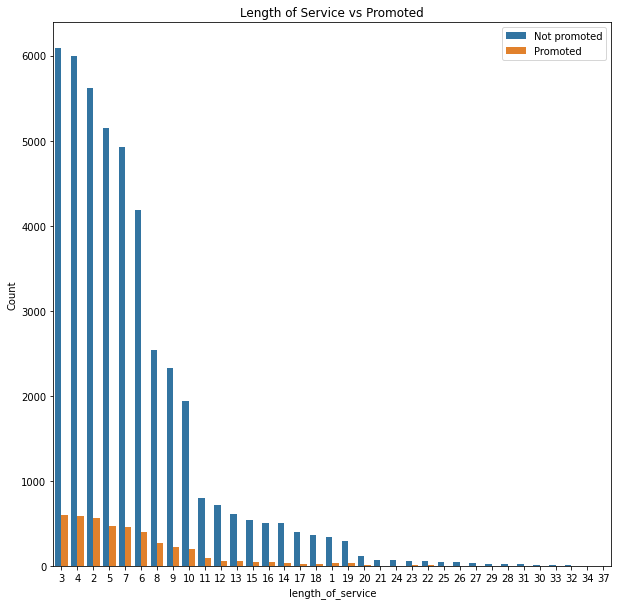

In [28]:
## length_of_service vs is promoted
plt.subplots(figsize=(10,10))
sns.countplot(x=hr_dataset['length_of_service'],hue=hr_dataset['is_promoted'] ,order = hr_dataset['length_of_service'].value_counts().index)
plt.title('Length of Service vs Promoted')
plt.ylabel('Count')
plt.legend(loc='upper right', labels=['Not promoted', 'Promoted'])

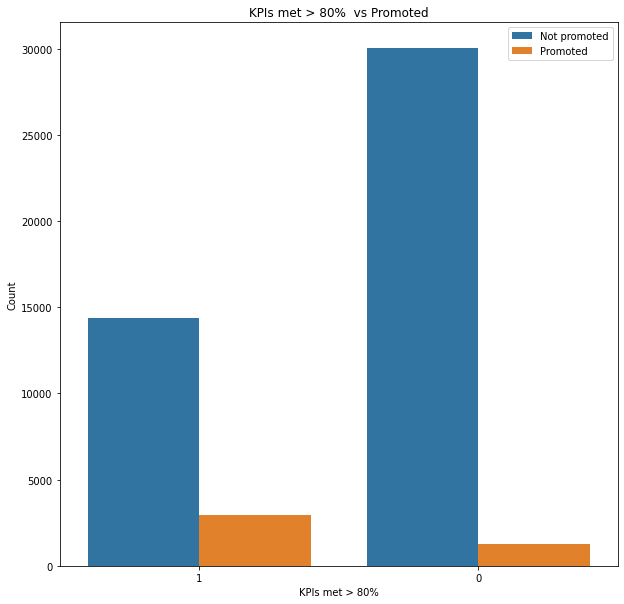

In [29]:
## KPIs_met >80% vs is promoted
plt.subplots(figsize=(10,10))
sns.countplot(x=hr_dataset['KPIs_met >80%'],hue=hr_dataset['is_promoted'], order = hr_dataset['KPIs_met >80%'].value_counts().sort_values().index)
plt.title('KPIs met > 80%  vs Promoted')
plt.xlabel('KPIs met > 80%')
plt.ylabel('Count')
plt.legend(loc='upper right', labels=['Not promoted', 'Promoted'])

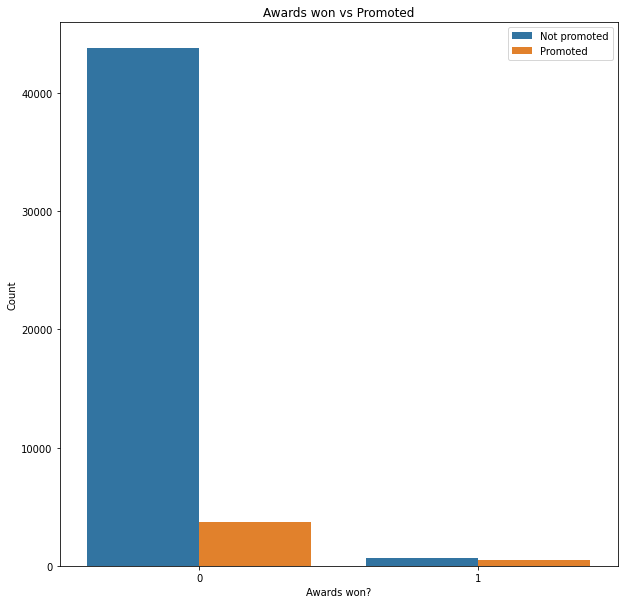

In [30]:
## awards_won? vs is promoted
plt.subplots(figsize=(10,10))
sns.countplot(x=hr_dataset['awards_won?'],hue=hr_dataset['is_promoted'], order = hr_dataset['awards_won?'].value_counts().index)
plt.title('Awards won vs Promoted')
plt.xlabel('Awards won?')
plt.ylabel('Count')
plt.legend(loc='upper right', labels=['Not promoted', 'Promoted'])

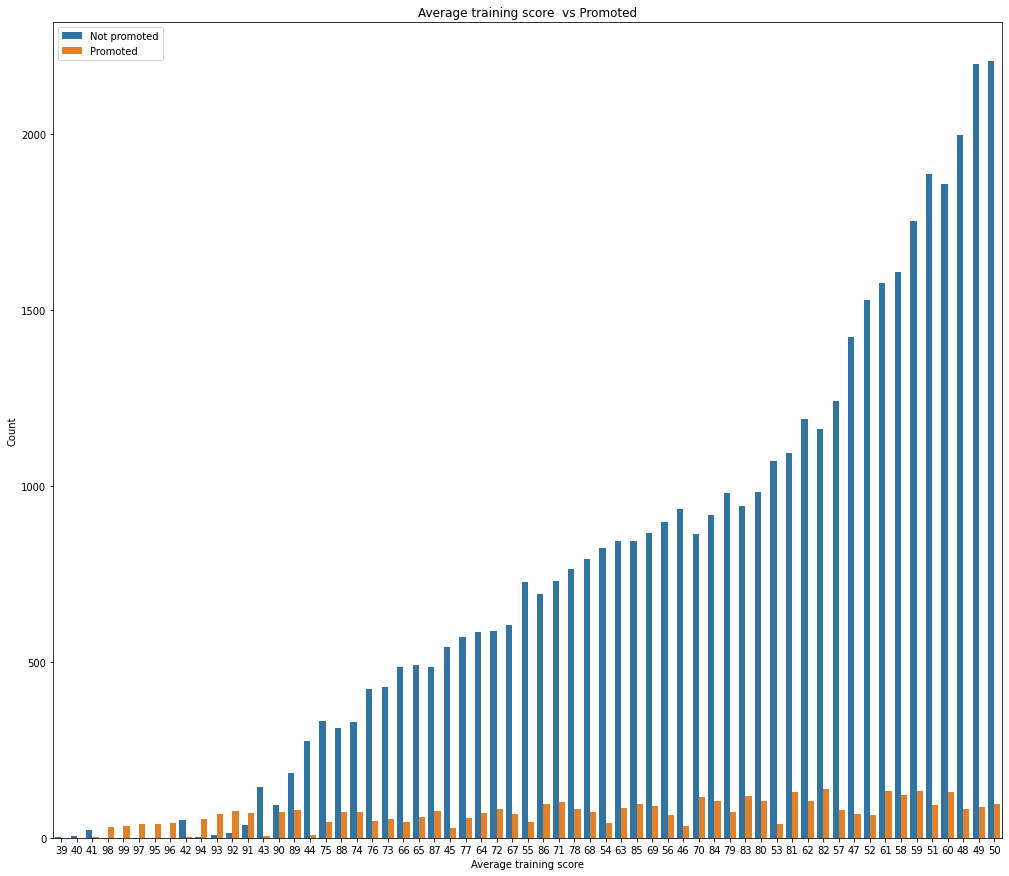

In [31]:
## avg_training_score vs is promoted

plt.subplots(figsize=(17,15))
sns.countplot(x=hr_dataset['avg_training_score'], hue=hr_dataset['is_promoted'], order = hr_dataset['avg_training_score'].value_counts().sort_values().index)
plt.title('Average training score  vs Promoted')
plt.xlabel('Average training score')
plt.ylabel('Count')
plt.legend(loc='upper left', labels=['Not promoted', 'Promoted'])

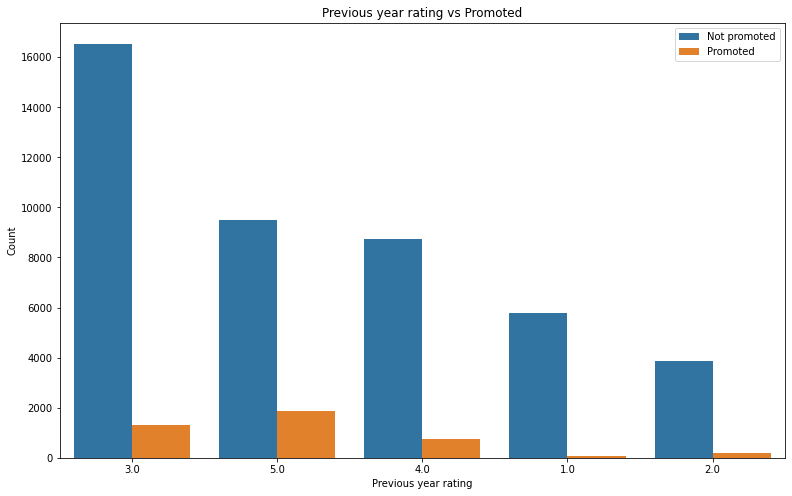

In [32]:
## previous_year_rating vs is promoted
plt.subplots(figsize=(13,8))
sns.countplot(x=hr_dataset['previous_year_rating'],hue=hr_dataset['is_promoted'], order = hr_dataset['previous_year_rating'].value_counts().index)
plt.title('Previous year rating vs Promoted')
plt.xlabel('Previous year rating')
plt.ylabel('Count')
plt.legend(labels=['Not promoted', 'Promoted'])

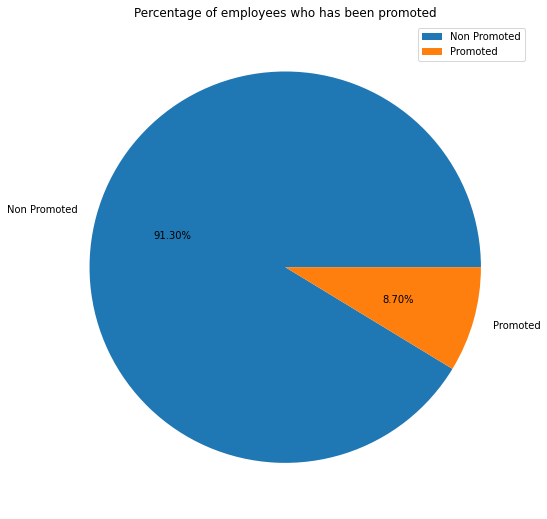

In [61]:
# Promoted employees vs non promoted
promoted=[]
non_promoted=[]

for i in hr_dataset['is_promoted']:
    if i==0:
        promoted.append(i)
    else:
        non_promoted.append(i)

promoted_arr=np.array(promoted)
non_promoted_arr=np.array(non_promoted)

size_promoted=promoted_arr.size
size_non_promoted=non_promoted_arr.size

size = (size_promoted,size_non_promoted)
labels = "Non Promoted", "Promoted"

fig = plt.figure()

plt.rcParams['figure.figsize'] = (12,12)
plt.pie(size, labels = labels, autopct = '%.2f%%')
fig.set_facecolor('white')
plt.title('Percentage of employees who has been promoted') #, fontsize = 20)

plt.legend()
plt.show()


## Processing data

In [34]:

# Target Variable
y = hr_dataset['is_promoted']

# Independant Variable
X =  hr_dataset.drop('is_promoted', axis=1)

# MAke train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('Size x_train: ', x_train.shape)
print('Size y_train: ', y_train.shape)
print('Size x_test: ', x_test.shape)
print('Size y_test: ', y_test.shape)

Size x_train:  (34062, 13)
Size y_train:  (34062,)
Size x_test:  (14598, 13)
Size y_test:  (14598,)


In [35]:
# we get rid of the employee_id column, in both test and train set, as it is not a significant column

emp_id_train = x_train['employee_id']
x_train = x_train.drop('employee_id', axis=1)

emp_id_test = x_test['employee_id']
x_test = x_test.drop('employee_id', axis=1)

In [36]:
# we need to create dummy variables for the categorical variables, as they can only have two different possibilities 

x_train_transformed = pd.get_dummies(x_train)
x_test_transformed = pd.get_dummies(x_test)

print('Columns x_train: ', x_train_transformed.columns)
print('Columns x_test: ', x_test_transformed.columns)

Columns x_train:  Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'regio

## Analysis of models

## Logistic regression

In [37]:
# Logistic Regression:

# Create the classifier. We need to increment the number of iterations
logistic_classifier = LogisticRegression(max_iter=2000)

# Adjust the classifier
logistic_classifier.fit(x_train_transformed, y_train.values.ravel())

# Predict the values
y_train_pred_l = logistic_classifier.predict(x_train_transformed)
y_test_pred_l = logistic_classifier.predict(x_test_transformed)

In [38]:
# Analyze the results

# First of all, create the confusion matrix for train set:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred_l).ravel()
print ('Confusion matrix for train set: ')
print("TP: ", tp)
print("FP: ", fp)
print("TN: ", tn)
print("FN: ", fn)
confusion_matrix_train_l = np.array([[tp,fp],[fn,tn]])
print(confusion_matrix_train_l)

# Standarize the confusion matrix to show the percentages of each value
confusion_matrix_train_normalized_l = confusion_matrix_train_l/len(y_train)
print ('Normalized confusion matrix for train set: ')
print (confusion_matrix_train_normalized_l)

# Deploy confusion matrix for test set:
print ('\nConfusion matrix for test set:  ')
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred_l).ravel()
print("TP: ", tp_test)
print("FP: ", fp_test)
print("TN: ", tn_test)
print("FN: ", fn_test)
confusion_matrix_test_l = np.array([[tp_test,fp_test],[fn_test,tn_test]])
print(confusion_matrix_test_l)

# Standarize the confusion matrix to show the percentages of each value
confusion_matrix_test_normalized_l = confusion_matrix_test_l/len(y_test)
print ('Normalized confusion matrix for test set: ')
print (confusion_matrix_test_normalized_l)


Confusion matrix for train set: 
TP:  780
FP:  175
TN:  30907
FN:  2200
[[  780   175]
 [ 2200 30907]]
Normalized confusion matrix for train set: 
[[0.02289942 0.00513769]
 [0.0645881  0.90737479]]

Confusion matrix for test set:  
TP:  333
FP:  90
TN:  13256
FN:  919
[[  333    90]
 [  919 13256]]
Normalized confusion matrix for test set: 
[[0.02281134 0.00616523]
 [0.06295383 0.9080696 ]]


In [39]:
# Check for over-adjustment

# Train set
accuray_score_train_l = accuracy_score(y_train, y_train_pred_l)
precision_score_train_l = precision_score(y_train, y_train_pred_l)
recall_score_train_l = recall_score(y_train, y_train_pred_l)

print ("Results for train set: ")
print('Accuracy: ', accuray_score_train_l)
print('Precision: ', precision_score_train_l)
print('Recall: ', recall_score_train_l)


print(classification_report(y_train,y_train_pred_l))

# test set
accuray_score_test_l = accuracy_score(y_test, y_test_pred_l)
precision_score_test_l = precision_score(y_test, y_test_pred_l)
recall_score_test_l = recall_score(y_test, y_test_pred_l)

print ("\nResults for test set: ")
print('Accuracy: ', accuray_score_test_l)
print('Precision: ', precision_score_test_l)
print('Recall: ', recall_score_test_l)
print(classification_report(y_test,y_test_pred_l))


Results for train set: 
Accuracy:  0.9302742058599025
Precision:  0.8167539267015707
Recall:  0.26174496644295303
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     31082
           1       0.82      0.26      0.40      2980

    accuracy                           0.93     34062
   macro avg       0.88      0.63      0.68     34062
weighted avg       0.92      0.93      0.91     34062


Results for test set: 
Accuracy:  0.930880942594876
Precision:  0.7872340425531915
Recall:  0.2659744408945687
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     13346
           1       0.79      0.27      0.40      1252

    accuracy                           0.93     14598
   macro avg       0.86      0.63      0.68     14598
weighted avg       0.92      0.93      0.91     14598



AUC:  0.6296154236542377
False positive rate:  [0.         0.00674359 1.        ]
Recall:  [0.         0.26597444 1.        ]
[2 1 0]


Text(0.5, 1.0, 'AUC = 0.63')

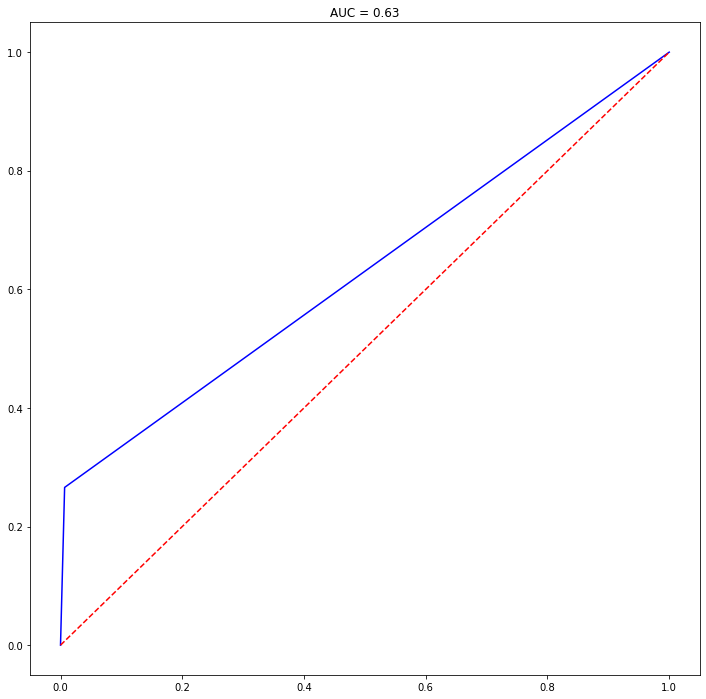

In [65]:
# Roc curve and AUC with test set:

false_positive_rate_l, recall_l, thresholds_l = roc_curve(y_test, y_test_pred_l, pos_label=1)
roc_auc_l = auc(false_positive_rate_l, recall_l)
print("AUC: ", roc_auc_l)
print("False positive rate: ", false_positive_rate_l)
print("Recall: ", recall_l)
print("Thresholds: ",thresholds_l)

plt.plot(false_positive_rate_l, recall_l, 'b')
plt.plot([0,1],[0,1],'r--')
plt.title('AUC = %0.2f' % roc_auc_l)

## Decision tree

In [41]:

# Decision tree classifier:

# Create the classifier and set the depth equat to 2 and  entropy as the criterion
dt_classifier = DecisionTreeClassifier (max_depth=2, criterion='entropy', random_state=1)

# Adjust the classifier
dt_classifier.fit(x_train_transformed, y_train)

# Predict the values
y_train_pred_dt = dt_classifier.predict(x_train_transformed)
y_test_pred_dt = dt_classifier.predict(x_test_transformed)


In [44]:
# Analyze the results

# First of all, create the confusion matrix for train set:
tnt, fpt, fnt, tpt = confusion_matrix(y_train, y_train_pred_dt).ravel()
print ('Confusion matrix for train set: ')
print("TP: ", tpt)
print("FP: ", fpt)
print("TN: ", tnt)
print("FN: ", fnt)
confusion_matrix_train_dt = np.array([[tpt,fpt],[fnt,tnt]])
print(confusion_matrix_train_dt)

# Standarize the confusion matrix to show the percentages of each value
confusion_matrix_train_normalized_dt = confusion_matrix_train_dt/len(y_train)
print ('Normalized confusion matrix for train set: ')
print (confusion_matrix_train_normalized_dt)

# Deploy confusion matrix for test set:
print ('\nConfusion matrix for test set:  ')
tn_testt, fp_testt, fn_testt, tp_testt = confusion_matrix(y_test, y_test_pred_dt).ravel()
print("TP: ", tp_testt)
print("FP: ", fp_testt)
print("TN: ", tn_testt)
print("FN: ", fn_testt)
confusion_matrix_test_dt = np.array([[tp_testt,fp_testt],[fn_testt,tn_testt]])
print(confusion_matrix_test_dt)

# Standarize the confusion matrix to show the percentages of each value
confusion_matrix_test_normalized_dt = confusion_matrix_test_dt/len(y_test)
print ('Normalized confusion matrix for test set: ')
print (confusion_matrix_test_normalized_dt)


La matriz de confusion para entrenamiento es: 
TP:  249
FP:  36
TN:  31046
FN:  2731
[[  249    36]
 [ 2731 31046]]
La matriz de confusion para entrenamiento NORMALIZADA es: 
[[0.0073102  0.0010569 ]
 [0.08017732 0.91145558]]
La matriz de confusion para test es: 
TP:  95
FP:  17
TN:  13329
FN:  1157
[[   95    17]
 [ 1157 13329]]
La matriz de confusion para test NORMALIZADA es: 
[[0.00650774 0.00116454]
 [0.07925743 0.91307028]]


In [45]:
# Check for over-adjustment

# Train set
accuray_score_train_dt = accuracy_score(y_train, y_train_pred_dt)
precision_score_train_dt = precision_score(y_train, y_train_pred_dt)
recall_score_train_dt = recall_score(y_train, y_train_pred_dt)

print ("Results for train set: ")
print('Accuracy: ', accuray_score_train_dt)
print('Precision: ', precision_score_train_dt)
print('Recall: ', recall_score_train_dt)
print(classification_report(y_train,y_train_pred_dt))


# test set
accuray_score_test_dt = accuracy_score(y_test, y_test_pred_dt)
precision_score_test_dt = precision_score(y_test, y_test_pred_dt)
recall_score_test_dt = recall_score(y_test, y_test_pred_dt)

print ("\nResults for test set: ")
print('Accuracy: ', accuray_score_test_dt)
print('Precision: ', precision_score_test_dt)
print('Recall: ', recall_score_test_dt)
print(classification_report(y_test,y_test_pred_dt))


Resultados conjunto de entrenamiento: 
Accuracy:  0.9187657800481475
Precision:  0.8736842105263158
Recall:  0.08355704697986577
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     31082
           1       0.87      0.08      0.15      2980

    accuracy                           0.92     34062
   macro avg       0.90      0.54      0.55     34062
weighted avg       0.92      0.92      0.89     34062


Resultados conjunto de entrenamiento: 
Accuracy:  0.9195780243869023
Precision:  0.8482142857142857
Recall:  0.07587859424920128
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13346
           1       0.85      0.08      0.14      1252

    accuracy                           0.92     14598
   macro avg       0.88      0.54      0.55     14598
weighted avg       0.91      0.92      0.89     14598



AUC:  0.537302402174803
AUC:  0.537302402174803


Text(0.5, 1.0, 'AUC = 0.54')

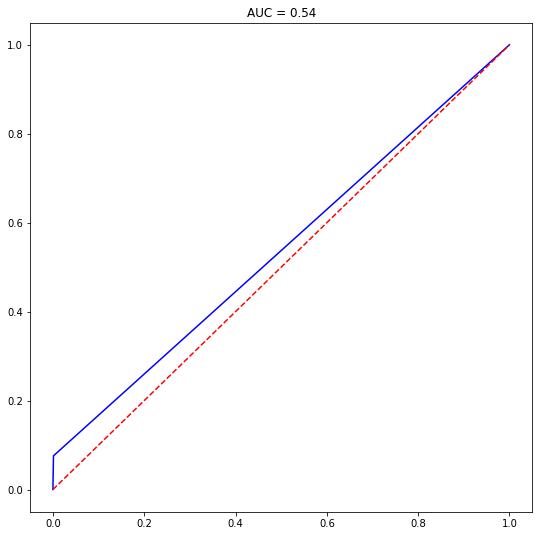

In [46]:
# Roc curve and AUC with test set:

false_positive_rate_dt, recall_dt, thresholds_dt = roc_curve(y_test, y_test_pred_dt)
roc_auc_dt = auc(false_positive_rate_dt, recall_dt)
print("AUC: ", roc_auc_dt)
print("False positive rate: ", false_positive_rate_dt)
print("Recall: ", recall_dt)
print("Thresholds: ", thresholds_dt)

plt.plot(false_positive_rate_dt, recall_dt, 'b')
plt.plot([0,1],[0,1],'r--')
plt.title('AUC = %0.2f' % roc_auc_dt)


## Random forest

In [47]:

# Random forest classifier

# Create the classifier and set the number of estimators equal to 15, the deep to 8 and and  entropy as the criterion
rf_classifier = RandomForestClassifier (criterion='entropy', n_estimators = 15, max_depth=8, random_state=1)

# Adjust the classifier
rf_classifier.fit(x_train_transformed, y_train)

# Predict the values
y_train_pred_rf = rf_classifier.predict(x_train_transformed)
y_test_pred_rf = rf_classifier.predict(x_test_transformed)


In [50]:
# Analyze the results

# First of all, create the confusion matrix for train set:
tnr, fpr, fnr, tpr = confusion_matrix(y_train, y_train_pred_rf).ravel()
print ('Confusion matrix for train set: ')
print("TP: ", tpr)
print("FP: ", fpr)
print("TN: ", tnr)
print("FN: ", fnr)
confusion_matrix_train_rf = np.array([[tpr,fpr],[fnr,tnr]])
print(confusion_matrix_train_rf)

# Standarize the confusion matrix to show the percentages of each value
confusion_matrix_train_normalized_rf = confusion_matrix_train_rf/len(y_train)
print ('Normalized confusion matrix for train set: ')
print (confusion_matrix_train_normalized_rf)

# Deploy confusion matrix for test set:
print ('\nConfusion matrix for test set:  ')
tn_testr, fp_testr, fn_testr, tp_testr = confusion_matrix(y_test, y_test_pred_rf).ravel()
print("TP: ", tp_testr)
print("FP: ", fp_testr)
print("TN: ", tn_testr)
print("FN: ", fn_testr)
confusion_matrix_test_rf = np.array([[tp_testr,fp_testr],[fn_testr,tn_testr]])
print(confusion_matrix_test_rf)

# Standarize the confusion matrix to show the percentages of each value
confusion_matrix_test_normalized_rf = confusion_matrix_test_rf/len(y_test)
print ('Normalized confusion matrix for test set: ')
print (confusion_matrix_test_normalized_rf)



La matriz de confusion para entrenamiento es: 
TP:  233
FP:  0
TN:  31082
FN:  2747
[[  233     0]
 [ 2747 31082]]
La matriz de confusion para entrenamiento NORMALIZADA es: 
[[0.00684047 0.        ]
 [0.08064706 0.91251248]]
La matriz de confusion para test es: 
TP:  86
FP:  4
TN:  13342
FN:  1166
[[   86     4]
 [ 1166 13342]]
La matriz de confusion para test NORMALIZADA es: 
[[5.89121798e-03 2.74010138e-04]
 [7.98739553e-02 9.13960817e-01]]


In [51]:
# Check for over-adjustment

# Train set
accuray_score_train_rf = accuracy_score(y_train, y_train_pred_rf)
precision_score_train_rf = precision_score(y_train, y_train_pred_rf)
recall_score_train_rf = recall_score(y_train, y_train_pred_rf)

print ("Results for train set: ")
print('Accuracy: ', accuray_score_train_rf)
print('Precision: ', precision_score_train_rf)
print('Recall: ', recall_score_train_rf)
print(classification_report(y_train,y_train_pred_rf))


# test set
accuray_score_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_score_test_rf = precision_score(y_test, y_test_pred_rf)
recall_score_test_rf = recall_score(y_test, y_test_pred_rf)

print ("\nResults for test set: ")
print('Accuracy: ', accuray_score_test_rf)
print('Precision: ', precision_score_test_rf)
print('Recall: ', recall_score_test_rf)
print(classification_report(y_train,y_train_pred_rf))


Resultados conjunto de entrenamiento: 
Accuracy:  0.9193529446303799
Precision:  1.0
Recall:  0.07818791946308724
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     31082
           1       1.00      0.08      0.15      2980

    accuracy                           0.92     34062
   macro avg       0.96      0.54      0.55     34062
weighted avg       0.93      0.92      0.89     34062


Resultados conjunto de entrenamiento: 
Accuracy:  0.9198520345252774
Precision:  0.9555555555555556
Recall:  0.06869009584664537
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     31082
           1       1.00      0.08      0.15      2980

    accuracy                           0.92     34062
   macro avg       0.96      0.54      0.55     34062
weighted avg       0.93      0.92      0.89     34062



AUC:  0.5341951902880763


Text(0.5, 1.0, 'AUC = 0.53')

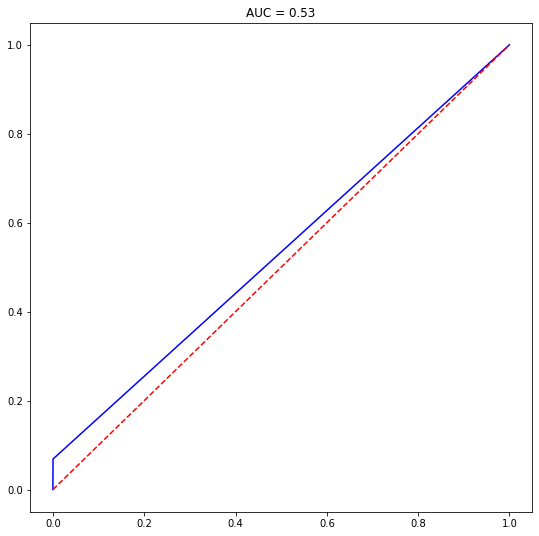

In [52]:
# Roc curve and AUC with test set:

false_positive_rate_rf, recall_rf, thresholds_rf = roc_curve(y_test, y_test_pred_rf)
roc_auc_rf = auc(false_positive_rate_rf, recall_rf)
print("AUC: ", roc_auc_rf)
print("False positive rate: ", false_positive_rate_rf)
print("Recall: ", recall_rf)
print("Thresholds: ", thresholds_rf)

plt.plot(false_positive_rate_rf, recall_rf, 'b')
plt.plot([0,1],[0,1],'r--')
plt.title('AUC = %0.2f' % roc_auc_rf)



## Support Vector Machines

In [53]:

# Support vector machine classifier:

# Create the classifie
svm_classifier = SVC()

# Adjust the classifier
svm_classifier.fit(x_train_transformed, y_train)

# Predict the values
y_train_pred_svm = svm_classifier.predict(x_train_transformed)
y_test_pred_svm = svm_classifier.predict(x_test_transformed)



In [ ]:
# Analyze the results

# First of all, create the confusion matrix for train set:
tn_svm, fp_svm, fn_svm, tp_svm = confusion_matrix(y_train, y_train_pred_svm).ravel()
print ('Confusion matrix for train set: ')
print("TP: ", tp_svm)
print("FP: ", fp_svm)
print("TN: ", tn_svm)
print("FN: ", fn_svm)
confusion_matrix_train_svm = np.array([[tp_svm,fp_svm],[fn_svm,tn_svm]])
print(confusion_matrix_train_svm)


# Standarize the confusion matrix to show the percentages of each value
confusion_matrix_train_normalized_svm = confusion_matrix_train_svm/len(y_train)
print ('Normalized confusion matrix for train set: ')
print (confusion_matrix_train_normalized_svm)

# Deploy confusion matrix for test set:
print ('\nConfusion matrix for test set:  ')
tn_test_svm, fp_test_svm, fn_test_svm, tp_test_svm = confusion_matrix(y_test, y_test_pred_svm).ravel()
print("TP: ", tp_test)
print("FP: ", fp_test_svm)
print("TN: ", tn_test_svm)
print("FN: ", fn_test_svm)
confusion_matrix_test_svm = np.array([[tp_test_svm,fp_test_svm],[fn_test_svm,tn_test_svm]])
print(confusion_matrix_test_svm)

# Standarize the confusion matrix to show the percentages of each value
confusion_matrix_test_normalized_svm = confusion_matrix_test_svm/len(y_test)
print ('Normalized confusion matrix for test set: ')
print (confusion_matrix_test_normalized_svm)

In [54]:
# Check for over-adjustment

# Train set
accuray_score_train_svm = accuracy_score(y_train, y_train_pred_svm)
precision_score_train_svm = precision_score(y_train, y_train_pred_svm)
recall_score_train_svm = recall_score(y_train, y_train_pred_svm)

print ("Results for train set: ")
print('Accuracy: ', accuray_score_train_svm)
print('Precision: ', precision_score_train_svm)
print('Recall: ', recall_score_train_svm)
print(classification_report(y_train,y_train_pred_svm))


# test set
accuray_score_test_svm = accuracy_score(y_test, y_test_pred_svm)
precision_score_test_svm = precision_score(y_test, y_test_pred_svm)
recall_score_test_svm = recall_score(y_test, y_test_pred_svm)

print ("\nResults for test set: ")
print('Accuracy: ', accuray_score_test_svm)
print('Precision: ', precision_score_test_svm)
print('Recall: ', recall_score_test_svm)
print(classification_report(y_test,y_test_pred_svm))


Resultados conjunto de entrenamiento: 
Accuracy:  0.9125124772473724
Precision:  0.0
Recall:  0.0
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     31082
           1       0.00      0.00      0.00      2980

    accuracy                           0.91     34062
   macro avg       0.46      0.50      0.48     34062
weighted avg       0.83      0.91      0.87     34062


Resultados conjunto de test: 
Accuracy:  0.9142348266885875
Precision:  0.0
Recall:  0.0
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     13346
           1       0.00      0.00      0.00      1252

    accuracy                           0.91     14598
   macro avg       0.46      0.50      0.48     14598
weighted avg       0.84      0.91      0.87     14598



C:\Users\alici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alici\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: P

AUC:  0.5


Text(0.5, 1.0, 'AUC = 0.50')

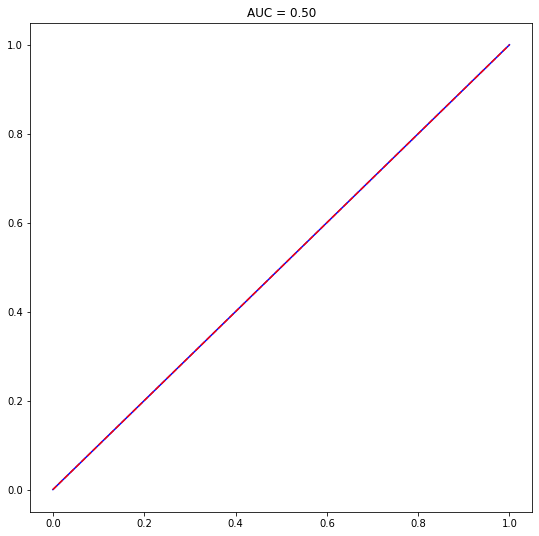

In [55]:
# Roc curve and AUC with test set:

false_positive_rate_svm, recall_svm, thresholds_svm = roc_curve(y_test, y_test_pred_svm)
roc_auc_svm = auc(false_positive_rate_svm, recall_svm)

print("AUC: ", roc_auc_svm)
print("False positive rate: ", false_positive_rate_svm)
print("Recall: ", recall_svm)
print("Thresholds: ", thresholds_svm)

plt.plot(false_positive_rate_svm, recall_svm, 'b')
plt.plot([0,1],[0,1],'r--')
plt.title('AUC = %0.2f' % roc_auc_svm)
